In [84]:
import pandas as pd
import math as m
from matplotlib import pyplot as plt
import numpy as np
import os
import re

from PIL import Image

In [50]:
folders = ["../../data/previous-catalog/50/DBA2J/catalog",
          "../../data/DBA2J/bed/50/minimap2-sniffles",
          "../../data/DBA2J/bed/50/ngmlr-sniffles",
          "../../data/DBA2J/bed/50/minimap2-pbsv"]

# for folder in folders:
#     df = pd.DataFrame(count_beds_in_folder(folder))
#     raw_data = raw_data.append(df)

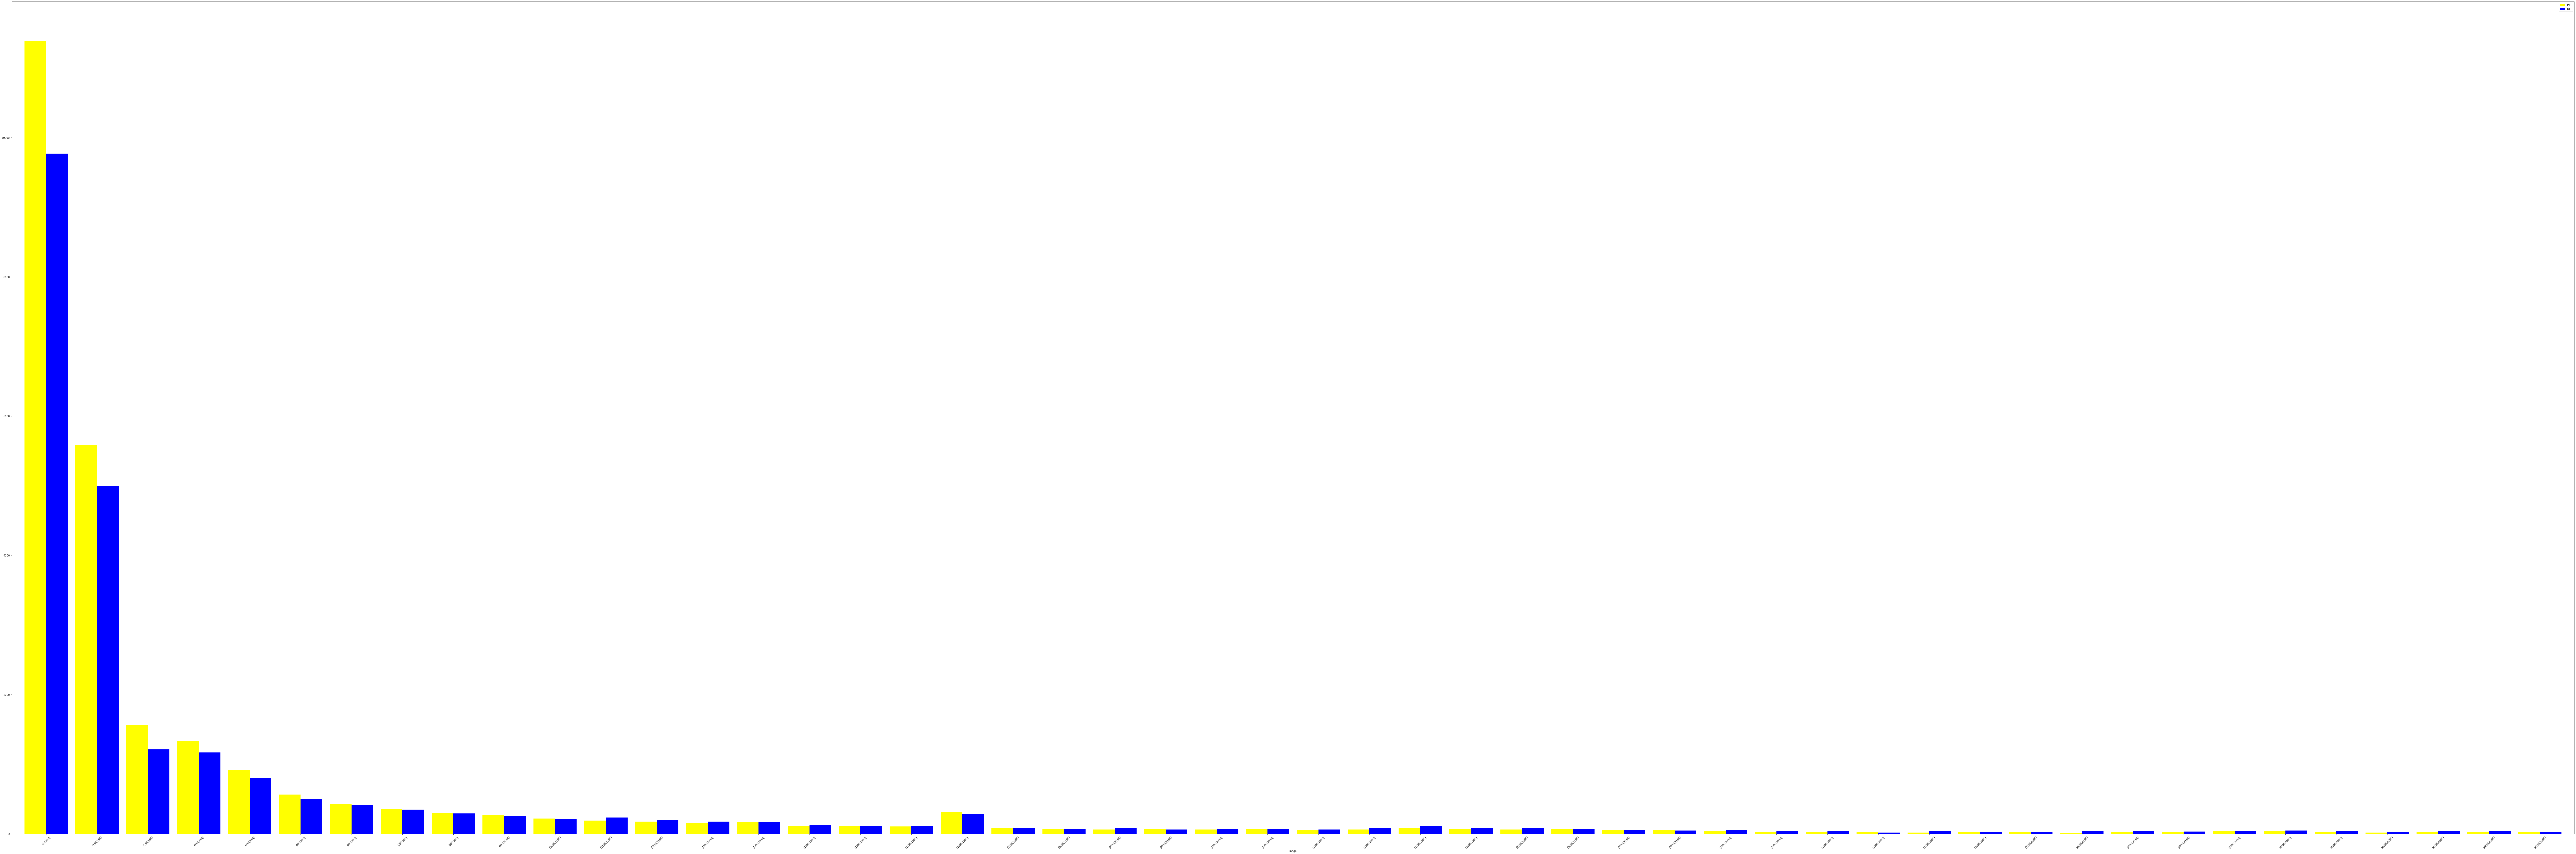

In [127]:
path = '../../data/DBA2J/bed/50/minimap2-sniffles'

rawdata =  pd.DataFrame()

for file in os.listdir(path):
    file_data = pd.read_csv(path + "/" + file, sep='\t', header=None, usecols=[3], names=["length"]) 
    
    sv_type = re.search('_([a-z]*).bed', file, re.IGNORECASE).group(1)
    file_data["type"]=sv_type
    
    rawdata = rawdata.append(file_data)

minlen = rawdata["length"].min()
#maxlen = rawdata["length"].max()
maxlen=5000
step = 100
bins = np.arange(minlen, maxlen, step)

finaldata = []

# maxval = 0

for start in bins:
    end = start + step
    ran = "("+ str(start) +"," + str(end) +"]"
    
    subset = rawdata[rawdata["length"].between(start, end, inclusive="left")]
    piv=pd.pivot_table(subset, values='length', columns=['type'], aggfunc=np.count_nonzero)
    piv["sum"]=piv.sum(axis=1)
    piv["range"]=ran
    
#     if piv['sum'].length > 0:
    finaldata.append(piv.to_dict('records')[0])

#     maxval +=1
#     if maxval >= 10000:
#         break
    
finaldf = pd.DataFrame(finaldata)
finaldf=finaldf.set_index('range').fillna(0)
finaldf = finaldf[["INS", "DEL"]]

ax = finaldf.plot.bar(figsize=(180,60), width=0.85, stacked=False, rot=45, color={"DEL": "blue", "INS": "yellow"})

# Yellow - Blue => minimap2-sniffles
# Red - Yellow => ngmlr-sniffles
# Blue - Red => minimap2-pbsv

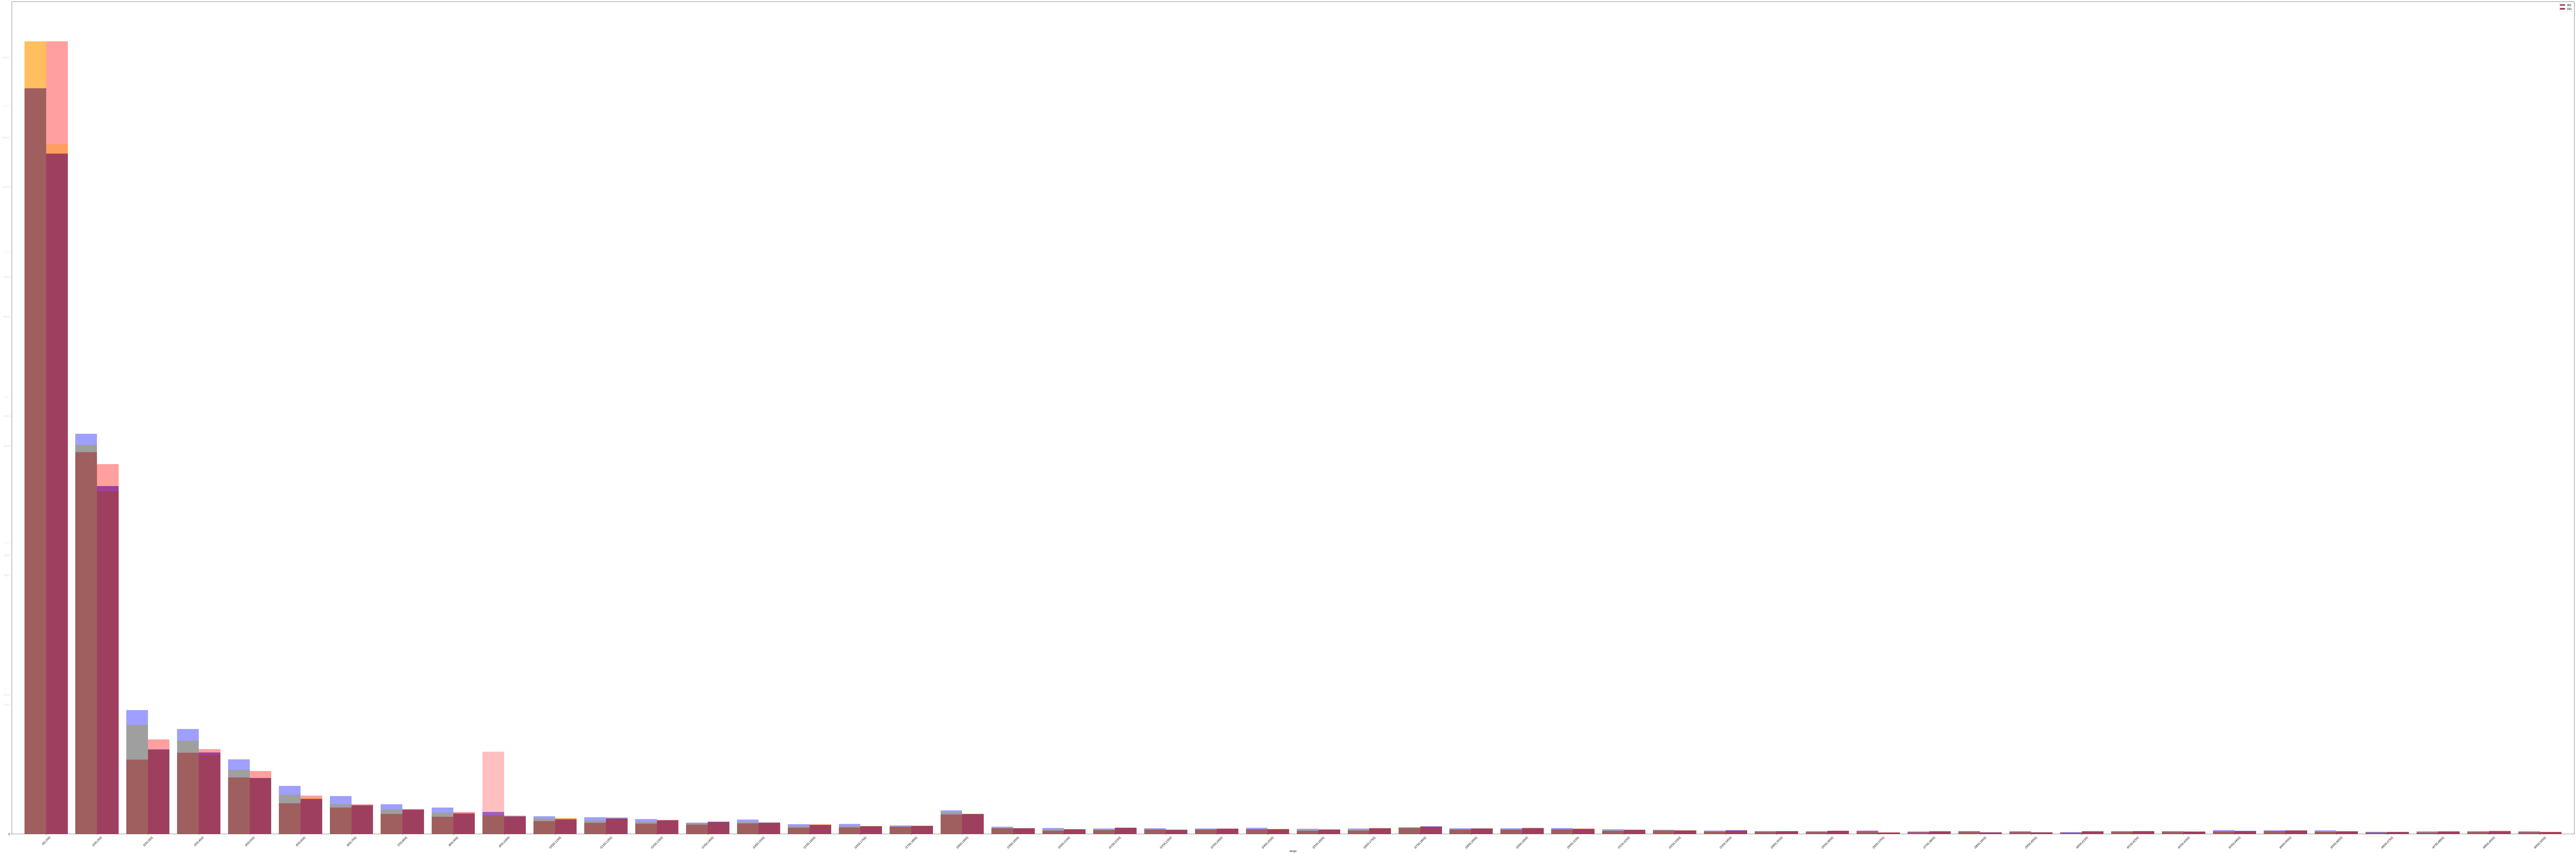

In [133]:
out1 = Image.open('img/minimap2-pbsv.png')
out2 = Image.open('img/minimap2-sniffles.png')
out3 = Image.open('img/ngmlr-sniffles.png')

out1 = out1.convert("RGBA")
out2 = out2.convert("RGBA")
out3 = out3.convert("RGBA")

out4 = Image.blend(out1, out2, 0.5)

out5 = Image.blend(out3, out4, 0.75)
out5
